In [214]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib as plt
import spacy

# Get the data and check it

In [215]:
unpickled_df = pd.read_pickle("C:/Users/amt/Documents/0. MSc Tinbergen/block 5. NLP/extracted_data.pkl")

In [227]:
#unpickled_df

* Take out the nan values

In [228]:
df = unpickled_df[unpickled_df['description'].notna()]
#df

# Corpus warm-up:
* Create the corpus of abstracts

In [229]:
corpus = df["description"].tolist()

In [226]:
#check how some values look like
#corpus[0], corpus[1010], corpus[2]

In [231]:
#type(corpus[0])

In [233]:
#len(corpus)
#1028 abstracts

In [237]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', corpus[i])
    corpus_all.extend(res)
    
#corpus_all

In [239]:
#len(corpus_all)

In [240]:
#type(corpus_all)

In [242]:
#print(corpus_all)

* Create a list all the unique words in the corpus

In [249]:
lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 14297 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

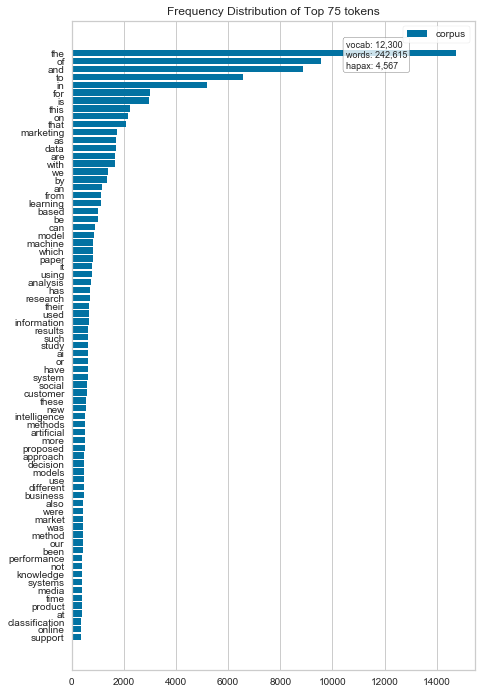

In [250]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

### Take out english stopwords and check which are the most used words

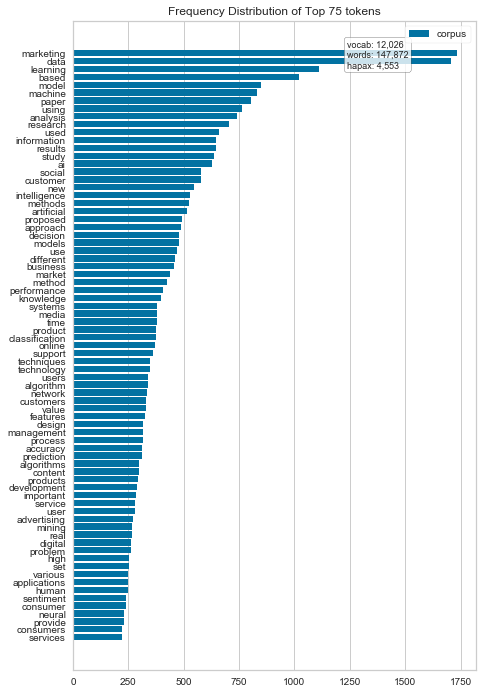

In [251]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

In [275]:
from sklearn.feature_extraction import stop_words
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'too', 'upon', 'anyone', 'everyone', 'meanwhile', 'i', 'myself', 'very', 'give', 'whereupon', 'first', 'these', 'though', 'she', 'ltd', 'everywhere', 'interest', 'indeed', 'onto', 'whatever', 'been', 'thence', 'have', 'noone', 'side', 'whither', 'as', 'had', 'get', 'therein', 'him', 'us', 'found', 'less', 'fifty', 'hers', 'such', 'latter', 'mine', 'call', 'both', 'over', 'third', 'nobody', 'than', 'anywhere', 'will', 'move', 'those', 'seems', 'hasnt', 'do', 'via', 'wherein', 'so', 'put', 'well', 'whoever', 'almost', 'ever', 'after', 'thus', 'still', 'to', 'would', 'made', 'throughout', 'without', 'me', 'since', 'yours', 'something', 'whereafter', 'again', 'system', 'are', 'due', 'latterly', 'couldnt', 'thereby', 'along', 'sixty', 'within', 'per', 'across', 'sometimes', 'four', 'detail', 'behind', 'other', 'many', 'done', 'nor', 'out', 'ours', 'you', 'from', 'before', 'it', 'whose', 'on', 'describe', 'may', 'yourself', 'around', 'everything', 'am', 'together', 'front', 'thems

* Check the most popular words only for some years

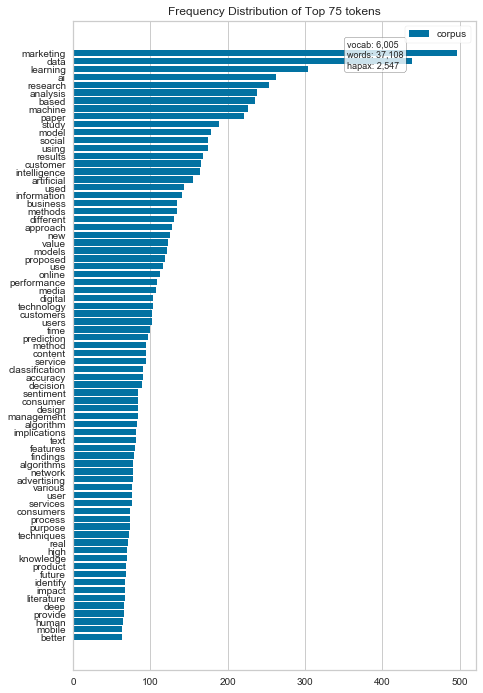

In [253]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus[200:500])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

### Lemmatizing

In [256]:
spacyen = spacy.load('en_core_web_sm')

In [257]:
corpus_all_lower = []

for each in corpus_all:
    each = each.lower().split()
    corpus_all_lower.extend(each)
    
corpus_all_lower 

['facebook',
 's',
 'utilisation',
 'of',
 'machine',
 'learning',
 'and',
 'artificial',
 'intelligence',
 'ai',
 'can',
 'often',
 'identify',
 'profitable',
 'targets',
 'more',
 'quickly',
 'and',
 'more',
 'effectively',
 'than',
 'can',
 'human',
 'campaign',
 'managers',
 'however',
 'there',
 'is',
 'still',
 'much',
 'that',
 'marketers',
 'may',
 'do',
 'to',
 'ensure',
 'optimal',
 'placement',
 'and',
 'delivery',
 'when',
 'it',
 'comes',
 'to',
 'their',
 'facebook',
 'ad',
 'campaigns',
 'and',
 'leveraging',
 'the',
 'power',
 'of',
 'facebook',
 's',
 'machine',
 'learning',
 'and',
 'ai',
 'capabilities',
 'this',
 'article',
 'discusses',
 'the',
 'some',
 'of',
 'the',
 'issues',
 'that',
 'marketers',
 'face',
 'in',
 'trying',
 'to',
 'fully',
 'utilise',
 'facebook',
 's',
 'machine',
 'learning',
 'capabilities',
 'and',
 'how',
 'many',
 'marketers',
 'struggle',
 'to',
 'create',
 'campaign',
 'structures',
 'that',
 'allow',
 'them',
 'to',
 'optimise',
 'and

In [259]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
corpus_all_lower_lemma =[]    
    
for each1 in corpus_all_lower:
    each1 = lemmatizer.lemmatize(each1)
    corpus_all_lower_lemma.extend(each1)
    
#corpus_all_lower_lemma

In [260]:
    
len(corpus_all_lower_lemma)

1365036

## Divide corpus into sentences

In [261]:
corpus[0]

'Facebook’s utilisation of machine learning and artificial intelligence (AI) can often identify profitable targets more quickly and more effectively than can human campaign managers. However, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their Facebook Ad campaigns and leveraging the power of Facebook’s machine learning and AI capabilities. This article discusses the some of the issues that marketers face in trying to fully utilise Facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on Facebook. This article will detail a few of these frameworks, strategies and tactics. The article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.'

In [262]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['Facebook’s utilisation of machine learning and artificial intelligence (AI) can often identify profitable targets more quickly and more effectively than can human campaign manage',
 'However, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their Facebook Ad campaigns and leveraging the power of Facebook’s machine learning and AI capabiliti',
 'This article discusses the some of the issues that marketers face in trying to fully utilise Facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on Facebo',
 'This article will detail a few of these frameworks, strategies and tacti',
 'The article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.']

In [263]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

5

In [265]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [266]:
df.loc[:,'nr_sentences_abstract']=corpus_sentences

C:\Users\amt\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\amt\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [267]:
df

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,nr_sentences_abstract
0,2-s2.0-85103933471,None,None,None,Why facebook ads keep failing: Lessons learned...,ar,Article,Huntinghouse J.,126017626;126017476;126017461,TAB Bank;Fluid Advertising;TAB Bank,...,None,298-307,Facebook’s utilisation of machine learning and...,Digital advertising | Digital marketing | Face...,0,0,None,undefined,None,5
1,2-s2.0-85103991839,None,None,None,Digital marketing: Incompatibilities between p...,ar,Article,Lies J.,126017869,FOM University of Applied Science,...,None,376-386,"Within digital marketing, marketing intelligen...",Creativity | Marketing 3.0 | Marketing 4.0 | M...,0,0,None,undefined,None,7
3,2-s2.0-85102648080,10.1016/j.tourman.2021.104318,S0261517721000376,None,A machine learning approach to cluster destina...,ar,Article,Arefieva V.,60021931;60009709,Johannes Kepler University Linz;Fachhochschule...,...,104318,None,Symbols are powerful in branding and marketing...,Destination image | Instagram | Machine learni...,1,1,None,undefined,None,6
4,2-s2.0-85103668790,10.1016/j.neucom.2021.02.036,S0925231221002824,None,A joint learning model for click-through predi...,ar,Article,Liu M.,60159715;60005465,"Xiaomi, Inc.;University of Electronic Science ...",...,None,206-219,Click-through rate (CTR) prediction is essenti...,Click-through rate prediction | Joint learning...,0,0,NSFC,61202445,National Natural Science Foundation of China,10
5,2-s2.0-85103407280,10.1016/j.jretconser.2021.102528,S0969698921000941,None,A tale of two recommender systems: The moderat...,ar,Article,Chinchanachokchai S.,60032143;60012521;125957352,University of Akron;Thammasat University;Datag...,...,102528,None,Recommender systems are used in e-Commerce web...,Algorithm | Artificial intelligence | Consumer...,0,0,None,undefined,None,5
6,2-s2.0-85104133729,10.1016/j.techfore.2021.120759,S0040162521001918,None,Classification of potential electric vehicle p...,ar,Article,Bas J.,60078684;60006222,A. James Clark School of Engineering;Newcastle...,...,120759,None,Among the many approaches towards fuel economy...,Adoption | Cluster analysis | Electric vehicle...,0,0,None,undefined,None,8
7,2-s2.0-85104061127,10.1016/j.jretconser.2021.102573,S0969698921001399,None,A neural network based price sensitive recomme...,ar,Article,Chen S.S.,60024666;60024260;60007616;60002027,National Central University Taiwan;Universität...,...,102573,None,The impact of price and price changes should n...,Consumer behaviour | Customer-product interact...,0,0,None,undefined,None,13
8,2-s2.0-85103731784,10.1016/j.jenvman.2021.112509,S0301479721005715,None,A spatially based quantile regression forest m...,ar,Article,Córdoba M.,60004518;60000658;126000340,Consejo Nacional de Investigaciones Científica...,...,112509,None,Rural land valuation plays an important role i...,Machine learning | Mass appraisal | Prediction...,0,0,UNDP,PNUD AR/16/005,United Nations Development Programme,13
9,2-s2.0-85104445685,10.1016/j.jretconser.2021.102576,S0969698921001429,None,Shopping centers revisited: The interplay betw...,ar,Article,Pantano E.,60171669;60020650;60020261,Middlesex University Business School;Universit...,...,102576,None,This paper revisits shopping centers' characte...,Brand image | Consumer behavior | Place attrac...,0,0,None,undefined,None,5
10,2-s2.0-85101388014,10.1016/j.neucom.2021.01.061,S0925231221000898,None,Distributed reinforcement learning algorithm o...,ar,Article,Wu G.,60073724;60010851,Yancheng Institute of Technology;Hohai University,...,None,212-222,As a key enabling technology in the emerging n...,Multi-agent | Network slicing | Operator compe...,0,0,NSFC,KC17072,National Natural Science Foundation of China,9


In [268]:
df.nr_sentences_abstract.describe()

count    1285.000000
mean        8.365759
std         3.580852
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        46.000000
Name: nr_sentences_abstract, dtype: float64

In [269]:
print(df.nr_sentences_abstract.sum(), "total number of sentences")
print(df.nr_sentences_abstract.median(), "median")
print(df.nr_sentences_abstract.describe())

10750 total number of sentences
8.0 median
count    1285.000000
mean        8.365759
std         3.580852
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        46.000000
Name: nr_sentences_abstract, dtype: float64


In [270]:
 print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

['Subject area: PT. Bank Central Asia, Tbk. (BCA), the largest national private bank in Indonesia, won an award for the Best Bank at the Euromoney Awards for Excellence (Asia) 2014. During the same event, in several categories, haloBCA  and BCA employees also won several awards. Previously, a number of awards were received by BCA such as: Best Indonesia Local Private Bank in 2010, Contact Center World Champion in 2012 and 2013, and Best Mega Contact Center in Asia Pacific Region in 2014. BCA is currently facing a problem of an aging population. Since the economy crisis facing the country in 1998, BCA has recruited fewer employees. The company resumed recruiting in 2010. BCA’s human resource (HR) profile in 2013 showed that nearly half of BCA’s permanent employees were aged 45 years or older, 40 per cent of whom have been working for more than 20 years. At the time of their retirement, the Bank faces the potential of losing a significant number of employees from three different generati

In [271]:
df.loc[df['nr_sentences_abstract'] == 46]['description']

1922    Subject area: PT. Bank Central Asia, Tbk. (BCA...
Name: description, dtype: object

In [272]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

['Subject area: ',
 'Bank Central Asia, T',
 '(BCA), the largest national private bank in Indonesia, won an award for the Best Bank at the Euromoney Awards for Excellence (Asia) 201',
 'uring the same event, in several categories, haloBCA  and BCA employees also won several awar',
 'Previously, a number of awards were received by BCA such as: Best Indonesia Local Private Bank in 2010, Contact Center World Champion in 2012 and 2013, and Best Mega Contact Center in Asia Pacific Region in 201',
 'CA is currently facing a problem of an aging populati',
 'Since the economy crisis facing the country in 1998, BCA has recruited fewer employe',
 'The company resumed recruiting in 201',
 'CA’s human resource (HR) profile in 2013 showed that nearly half of BCA’s permanent employees were aged 45 years or older, 40 per cent of whom have been working for more than 20 yea',
 'At the time of their retirement, the Bank faces the potential of losing a significant number of employees from three different

In [277]:
#We should also extract the keywords maybe

In [278]:
keywords = df["authkeywords"].tolist()

In [280]:
keywords[0]

'Digital advertising | Digital marketing | Facebook | Machine learning | Social media | Video marketing'

In [281]:
keywords_all = []

for i in range(0,len(keywords)):
    res = re.findall(r'\w+[a-zA-Z][ ][|]', keywords[i])
    keywords_all.extend(res)
    
keywords_all

TypeError: expected string or bytes-like object